# S-Cubes usage example

In [ ]:
from splusdata.scubes.core import SCubes

OBJNAME = 'NGC1344'
RA = 52.08196       # DEG
DEC = -31.06817     # DEG

FIELD='SPLUS-s24s34'
STAMP_SIZE = 1000    # PIX
VERBOSITY_LEVEL = 1

scube = SCubes(RA, DEC, FIELD, size=STAMP_SIZE, verbose=VERBOSITY_LEVEL)  #, username='XXX', password='XXX')
scube.create_cube(objname=OBJNAME, force=True)

###
### SCubes.create_cube() write_fits parameter defaults to false. 
### One can write the output FITS after create_cube() call using:
###
#cubepath = f'{OBJNAME}_cube.fits'
#scube.write(cubepath, overwrite=True)

NGC1344 @ SPLUS-s24s34 - Downloading:   0%|          | 0/12 [00:00<?, ?it/s]

[2025-08-25T14:22:03.624963] - : Downloading zp_model SPLUS-s24s34_u_zp_model.json


[2025-08-25T14:22:06.594782] - : Downloading zp_model SPLUS-s24s34_F378_zp_model.json
[2025-08-25T14:22:09.564084] - : Downloading zp_model SPLUS-s24s34_F395_zp_model.json
[2025-08-25T14:22:12.682262] - : Downloading zp_model SPLUS-s24s34_F410_zp_model.json
[2025-08-25T14:22:15.554321] - : Downloading zp_model SPLUS-s24s34_F430_zp_model.json
[2025-08-25T14:22:18.449784] - : Downloading zp_model SPLUS-s24s34_g_zp_model.json
[2025-08-25T14:22:38.438673] - : Downloading zp_model SPLUS-s24s34_F515_zp_model.json
[2025-08-25T14:22:41.612913] - : Downloading zp_model SPLUS-s24s34_r_zp_model.json
[2025-08-25T14:22:44.757513] - : Downloading zp_model SPLUS-s24s34_F660_zp_model.json
[2025-08-25T14:22:47.532679] - : Downloading zp_model SPLUS-s24s34_i_zp_model.json
[2025-08-25T14:22:50.726406] - : Downloading zp_model SPLUS-s24s34_F861_zp_model.json
[2025-08-25T14:22:53.798849] - : Downloading zp_model SPLUS-s24s34_z_zp_model.json


/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/core.py:152: RuntimeWarning: divide by zero encountered in divide
  calib_data_err__byx = np.sqrt(1/weidata__byx + np.abs(calib_data__byx)/gain__byx)
/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/core.py:176: RuntimeWarning: cdelt will be ignored since cd is present
  nw.wcs.cdelt[:2] = w.wcs.cdelt


/tmp/ipykernel_48214/4147071247.py:17: RuntimeWarning: divide by zero encountered in log10
  logflux__yx = np.log10(flux__byx[i]) + 18
/tmp/ipykernel_48214/4147071247.py:17: RuntimeWarning: invalid value encountered in log10
  logflux__yx = np.log10(flux__byx[i]) + 18


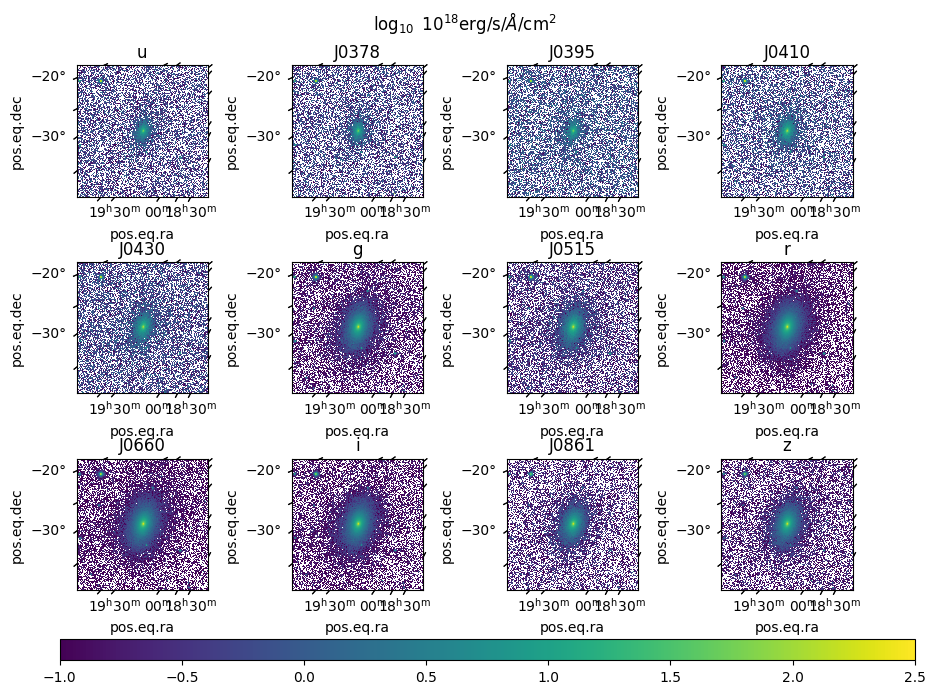

In [18]:
import numpy as np
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from splusdata.vars import BANDS

wcs = WCS(scube.cube[0].header, naxis=(1, 2))

flux__byx = scube.flam__byx.value*scube.flam_scale

f = plt.figure()
f.set_size_inches(9, 7)

# plot bands
for i, band in enumerate(BANDS):
    ax = f.add_subplot(3, 4, i+1, projection=wcs)
    ax.set_title(band)
    logflux__yx = np.log10(flux__byx[i]) + 18
    im = ax.imshow(logflux__yx, origin='lower', vmin=-1, vmax=2.5, interpolation='nearest')
    #ax.grid()

f.suptitle(r'$\log_{10}$ 10$^{18}$erg/s/$\AA$/cm$^2$')
f.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.9, wspace=0.3, hspace=0.5)
left, bottom, width, height = 0.05, 0.05, 0.95, 0.03
cb_ax = f.add_axes([left, bottom, width, height])
f.colorbar(im, cax=cb_ax, location='bottom')

## Lupton RGB

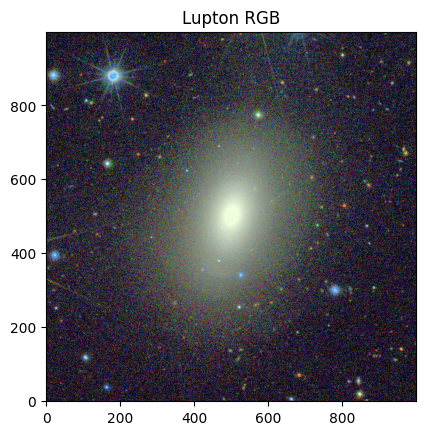

In [21]:
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb

R__yx = scube.flam__byx[BANDS.index('i')]
G__yx = scube.flam__byx[BANDS.index('r')]
B__yx = scube.flam__byx[BANDS.index('g')]

RGB__yxc = make_lupton_rgb(R__yx, G__yx, B__yx, stretch=3)

plt.title('Lupton RGB')
plt.imshow(RGB__yxc, origin='lower')

ColDefs(
    name = 'filter'; format = '5A'
    name = 'central_wave'; format = 'D'
    name = 'pivot_wave'; format = 'D'
    name = 'PSFFWHM'; format = 'D'
)
[('u', 3576.5900319 , 3533.28150603, 1.82472394)
 ('J0378', 3770.66765668, 3773.16495619, 1.72229196)
 ('J0395', 3940.66900669, 3940.69812172, 1.5467815 )
 ('J0410', 4094.0795908 , 4094.92800733, 1.50075204)
 ('J0430', 4292.0201202 , 4292.10579006, 1.39930446)
 ('g', 4774.02604026, 4758.4878587 , 1.42083696)
 ('J0515', 5132.82097321, 5133.13247975, 1.41260906)
 ('r', 6274.74334743, 6251.83097429, 1.34019043)
 ('J0660', 6613.99318993, 6613.87556039, 1.27062651)
 ('i', 7702.49932499, 7670.61445983, 1.20769004)
 ('J0861', 8611.48166482, 8607.25421702, 1.09500597)
 ('z', 8881.70071701, 8941.47606623, 1.15757403)]


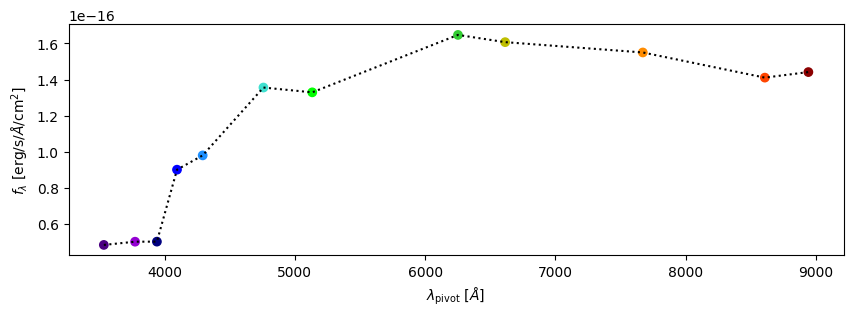

In [39]:
BAND_COLORS = {
    'u': 'indigo',
    'J0378': 'darkviolet',
    'J0395': 'navy',
    'J0410': 'b',
    'J0430': 'dodgerblue',
    'g': 'turquoise',
    'J0515': 'lime',
    'r': 'limegreen',
    'J0660': 'y',
    'i': 'darkorange',
    'J0861': 'orangered',
    'z': 'darkred',
}

# METADATA
metadata = scube.cube[4].data
print(metadata.columns)
print(metadata)

c = [BAND_COLORS[x] for x in metadata['filter']]

# central pixel
ix0, iy0 = int(scube.cube[0].header['X01TILE']), int(scube.cube[0].header['Y01TILE'])

plt.figure(figsize=(10, 3))
plt.ylabel(r'$f_\lambda$ [erg/s/$\AA$/cm$^2$]')
plt.xlabel(r'$\lambda_{\rm pivot}$ [$\AA$]')
x, y = metadata['pivot_wave'], scube.flam__byx[:, iy0, ix0].value*scube.flam_scale
plt.plot(x,y, 'k:')
plt.scatter(x, y, c=c)